# Project 4

### Getting Dataset - Breast Cancer

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
df = pd.DataFrame(load_breast_cancer()['data'], columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target'] 

Conclusion: df has all the breast cancer data including the target column.

In [2]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'y'],
      dtype='object')

df.head(2)

### Data Preprocessing Steps

#### 1. Find and handle missing data

In [3]:
# 1. df.null(): Returns Boolean value for each cell in the dataframe.
# 2. df.null().any(): Returns Boolean value for each coulmn in the dataframe.
# 3. df.null().any().sum(): Return No. of True values in the entire dataframe.
# Logical Application Sequence: 3,2,1
df.isnull().any().sum()

0

Conclusion: No Null or Missing Values

#### 2. Removing Duplicates

In [4]:
# df.duplicated(): Returns duplicate rows with a boolead value
# df.duplicated().any(): Returns Ture Boolean value if there are any duplicate row/s present in the dataframe, False otherwise.
df.duplicated().any()

False

Conclusion: No Duplicate Rows

#### 3. Correcting Inconsistent Data

In [5]:
# Inconsistent Formatting, Data Type and Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Conclusion: The Data Types and Values are consistent. All are numerical data. If there were any string in place of float or int the Dtype would have been object. Also the formatting of the values are consistent in relation to the column_names.

#### 4. Data Standardization

In [6]:
# Check the range of each column
val_range=pd.DataFrame({'Min':df.min(),'Max':df.max(),'Range':(df.max()-df.min())})
val_range

,Min,Max,Range
mean radius,6.981000,28.11000,21.129000
mean texture,9.710000,39.28000,29.570000
mean perimeter,43.790000,188.50000,144.710000
mean area,143.500000,2501.00000,2357.500000
mean smoothness,0.052630,0.16340,0.110770
mean compactness,0.019380,0.34540,0.326020
mean concavity,0.000000,0.42680,0.426800
mean concave points,0.000000,0.20120,0.201200
mean symmetry,0.106000,0.30400,0.198000
mean fractal dimension,0.049960,0.09744,0.047480


Conclusion: In this specific case, since we plan to use machine learning models like decision trees or random forests, standard scaling may not be necessary as these models are robust to feature scales. But had we planned to use machine learning models like KNN or SVM, then standard scaling would be necessary to ensure that the features are on the same scale as these models are very sensitive to feature scales.

#### 5. Data Transformation

Conclusion: Since all values are Numerical and Scaling them, as discussed in previous cell, is not necessary, there is no need for Data Transformation.

#### 6. Feature Selection

In [7]:
#Splitting into Dependent and Independent Variables
X= df.drop('y',axis=1)
y= df['y']

In [8]:
X.shape

(569, 30)

In [9]:
y.shape

(569,)

#### 7. Data Splitting

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


#### 8. Data Imbalance

**Data Imbalance Check only on y_train**

In [12]:
y_train.nunique()

2

1 appears 288 times in the list.
0 appears 167 times in the list.


<BarContainer object of 2 artists>

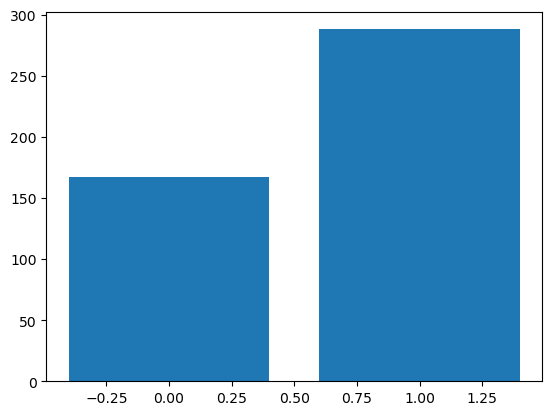

In [14]:
import collections
from matplotlib import pyplot as plt
count = collections.Counter(y_train)
dictionary= {}
for key, value in count.items():
    dictionary[key]= value
    print(f"{key} appears {value} times in the list.")

dictionary
plt.bar(list(dictionary.keys()),list(dictionary.values()))

Conclusion: There seem to be imbalance in the data so we handle it using SMOTE
##### Handling Imbalance Data

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 288
Before OverSampling, counts of label '0': 167 

After OverSampling, the shape of train_X: (576, 30)
After OverSampling, the shape of train_y: (576,) 

After OverSampling, counts of label '1': 288
After OverSampling, counts of label '0': 288


Conclusion: Now we have a balanced training data.

### ML Model Selection

1. Decision Tree - `dt_1`
2. Random Forest - `rfr_1`
3. Gradient Boosting Method - `gbm_1`
4. K-Nearest Neighbour - `knn_1`

In [21]:
from sklearn import metrics

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc

#### Using Default Hyper-parameters

##### 1. DecisionTreeClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_1= DecisionTreeClassifier()
dt_1.fit(X_train,y_train)
dt_1_pred= dt_1.predict(X_test)

In [26]:
dt_1_acc= metrics.accuracy_score(y_test, dt_1_pred)
print("Accuracy:",dt_1_acc)

Accuracy: 0.9210526315789473


In [57]:
fpr, tpr, thresholds = roc_curve(y_test, dt_1_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, dt_1_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.9f' % (accuracy_score(y_test, dt_1_pred)))
print ('Classification Report : \n', classification_report(y_test, dt_1_pred))
print('AUC-ROC:',roc_auc_score(y_test, dt_1_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, dt_1_pred))

Confusion Matrix : 
 [[44  1]
 [ 8 61]]
Accuracy Score is 0.921052632
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91        45
           1       0.98      0.88      0.93        69

    accuracy                           0.92       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114

AUC-ROC: 0.9309178743961353
LOGLOSS Value is 2.8456


##### 2. RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_1= RandomForestClassifier(random_state=0, warm_start = True)
rf_1.fit(X_train,y_train)
rf_1_pred= rf_1.predict(X_test)

In [27]:
rf_1_acc= metrics.accuracy_score(y_test, rf_1_pred)
print("Accuracy:",rf_1_acc)

Accuracy: 0.9473684210526315


##### 3. GradientBoostingClassifier

In [19]:

from sklearn.ensemble import GradientBoostingClassifier
gbm_1= GradientBoostingClassifier()
gbm_1.fit(X_train,y_train)
gbm_1_pred= gbm_1.predict(X_test)

In [28]:
gbm_1_acc= metrics.accuracy_score(y_test, gbm_1_pred)
print("Accuracy:",gbm_1_acc)

Accuracy: 0.9298245614035088


##### 4. K-NeighborsClassifier

In [20]:

from sklearn.neighbors import KNeighborsClassifier
knn_1= KNeighborsClassifier()
knn_1.fit(X_train,y_train)
knn_1_pred= knn_1.predict(X_test)

In [29]:
knn_1_acc= metrics.accuracy_score(y_test, knn_1_pred)
print("Accuracy:",knn_1_acc)

Accuracy: 0.9122807017543859


##### Accuracy Evaluation of the above 4 Classifiers without tuning Hyper-Parameters

In [35]:
metric_df= pd.DataFrame({'DecisionTreeClassifier':dt_1_acc,
                         'RandomForestClassifier':rf_1_acc,
                         'GradientBoostingMethod':gbm_1_acc,
                         'K-NearestNeighborClassifier':knn_1_acc},index=['Accuracy'])
print('Accuracies of Models without tuninig hyper-parameters:')
metric_df

Accuracies of Models without tuninig hyper-parameters:


,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingMethod,K-NearestNeighborClassifier
Accuracy,0.921053,0.947368,0.929825,0.912281


Conclusion: RandomForestClassifier seem to give better performance as compared to other classifiers.

#### Using Tuned Hyper-parameters

In [41]:
from sklearn.model_selection import GridSearchCV

##### 1. DecisionTreeClassifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_2= DecisionTreeClassifier()

In [49]:
dt_2_tuned_parameters={'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 50, 100], 'min_samples_leaf':[10, 20, 50]}
cv_grid = GridSearchCV(dt_2, param_grid = rf_tuned_parameters, verbose = 5)
cv_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.901 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.901 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.923 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.912 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=10;, score=0.945 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.890 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.879 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.967 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.912 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=20;, score=0.9

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50]},
             verbose=5)

In [50]:
cv_grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}

In [51]:
best_parameters = cv_grid.best_estimator_.get_params()
best_parameters

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [59]:
dt_2_pred = cv_grid.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, dt_2_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, dt_2_pred)
print('Confusion Matrix : \n', results)
print('Accuracy Score is %.9f' % (accuracy_score(y_test, dt_2_pred)))
print('Classification Report : \n', classification_report(y_test, dt_2_pred))
print('AUC-ROC:',roc_auc_score(y_test, dt_2_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, dt_2_pred))

Confusion Matrix : 
 [[41  4]
 [ 5 64]]
Accuracy Score is 0.921052632
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        45
           1       0.94      0.93      0.93        69

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

AUC-ROC: 0.9193236714975846
LOGLOSS Value is 2.8456


##### 2. RandomForestClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf_2= RandomForestClassifier()

In [63]:
rf_tuned_parameters = {"max_depth": [10, 20, 50, 100], 'n_estimators': [50, 100, 200, 500], 'min_samples_leaf': [10, 20, 50]}
cv_grid = GridSearchCV(rf_2, param_grid = rf_tuned_parameters, verbose = 5)
cv_grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=10, min_samples_leaf=10, n_estimators=50;, score=0.912 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=10, n_estimators=50;, score=0.978 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=10, n_estimators=50;, score=0.967 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=10, n_estimators=50;, score=0.956 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=10, n_estimators=50;, score=0.945 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=10, n_estimators=100;, score=0.923 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=10, n_estimators=100;, score=0.967 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=10, n_estimators=100;, score=0.956 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=10, n_estimators=100;, score=0.934 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=10, n_estimators=

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50],
                         'n_estimators': [50, 100, 200, 500]},
             verbose=5)

In [64]:
best_parameters = cv_grid.best_estimator_.get_params()
best_parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [65]:
rf_2_pred = cv_grid.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, rf_2_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, rf_2_pred)
print('Confusion Matrix : \n', results)
print('Accuracy Score is %.9f' % (accuracy_score(y_test, rf_2_pred)))
print('Classification Report : \n', classification_report(y_test, rf_2_pred))
print('AUC-ROC:',roc_auc_score(y_test, rf_2_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, rf_2_pred))

Confusion Matrix : 
 [[42  3]
 [ 6 63]]
Accuracy Score is 0.921052632
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        45
           1       0.95      0.91      0.93        69

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

AUC-ROC: 0.9231884057971015
LOGLOSS Value is 2.8456


##### 3. GradientBoostingClassifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_2= GradientBoostingClassifier()

In [68]:
rf_tuned_parameters = {"max_depth": [10, 20, 50, 100], 'n_estimators': [50, 100, 200, 500], 
                       'min_samples_leaf': [10, 20, 50], 'learning_rate': [0.1, 0.01]}

In [70]:
cv_grid = GridSearchCV(gbm_2, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5) # 'recall', my_score
cv_grid.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50;, score=0.989 total time=   0.5s
[CV 2/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50;, score=1.000 total time=   0.4s
[CV 3/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50;, score=0.998 total time=   0.4s
[CV 4/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50;, score=0.983 total time=   0.4s
[CV 5/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=50;, score=0.997 total time=   0.4s
[CV 1/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100;, score=0.984 total time=   0.9s
[CV 2/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100;, score=0.999 total time=   0.9s
[CV 3/5] END learning_rate=0.1, max_depth=10, min_samples_leaf=10, n_estimators=100;, score=1.000 total time=   0.8s
[CV 4/5

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='roc_auc', verbose=5)

In [71]:
best_parameters = cv_grid.best_estimator_.get_params()
best_parameters

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [72]:
gbm_2_pred = cv_grid.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, gbm_2_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, gbm_2_pred)
print('Confusion Matrix : \n', results)
print('Accuracy Score is %.9f' % (accuracy_score(y_test, gbm_2_pred)))
print('Classification Report : \n', classification_report(y_test, gbm_2_pred))
print('AUC-ROC:',roc_auc_score(y_test, gbm_2_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, gbm_2_pred))

Confusion Matrix : 
 [[43  2]
 [ 3 66]]
Accuracy Score is 0.956140351
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95        45
           1       0.97      0.96      0.96        69

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

AUC-ROC: 0.9560386473429953
LOGLOSS Value is 1.5809


##### 4. K-NeighborsClassifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn_2= KNeighborsClassifier()

In [78]:
rf_tuned_params= {'n_neighbors':[2,3,5,7],'weights':['uniform','distance'],'leaf_size':[10,20,30],'p':[1,2]}

In [79]:
cv_grid = GridSearchCV(knn_2, param_grid = rf_tuned_params, scoring = 'roc_auc', verbose = 5) # 'recall', my_score
cv_grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END leaf_size=10, n_neighbors=2, p=1, weights=uniform;, score=0.898 total time=   0.0s
[CV 2/5] END leaf_size=10, n_neighbors=2, p=1, weights=uniform;, score=0.955 total time=   0.0s
[CV 3/5] END leaf_size=10, n_neighbors=2, p=1, weights=uniform;, score=0.963 total time=   0.0s
[CV 4/5] END leaf_size=10, n_neighbors=2, p=1, weights=uniform;, score=0.939 total time=   0.0s
[CV 5/5] END leaf_size=10, n_neighbors=2, p=1, weights=uniform;, score=0.955 total time=   0.0s
[CV 1/5] END leaf_size=10, n_neighbors=2, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 2/5] END leaf_size=10, n_neighbors=2, p=1, weights=distance;, score=0.953 total time=   0.0s
[CV 3/5] END leaf_size=10, n_neighbors=2, p=1, weights=distance;, score=0.961 total time=   0.0s
[CV 4/5] END leaf_size=10, n_neighbors=2, p=1, weights=distance;, score=0.939 total time=   0.0s
[CV 5/5] END leaf_size=10, n_neighbors=2, p=1, weights=distance;, scor

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30], 'n_neighbors': [2, 3, 5, 7],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=5)

In [80]:
best_parameters = cv_grid.best_estimator_.get_params()
best_parameters

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 1,
 'weights': 'distance'}

In [81]:
knn_2_pred = cv_grid.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, knn_2_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, knn_2_pred)
print('Confusion Matrix : \n', results)
print('Accuracy Score is %.9f' % (accuracy_score(y_test, knn_2_pred)))
print('Classification Report : \n', classification_report(y_test, knn_2_pred))
print('AUC-ROC:',roc_auc_score(y_test, knn_2_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, knn_2_pred))

Confusion Matrix : 
 [[40  5]
 [ 4 65]]
Accuracy Score is 0.921052632
Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        45
           1       0.93      0.94      0.94        69

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

AUC-ROC: 0.9154589371980676
LOGLOSS Value is 2.8456


##### Accuracy Evaluation of the above 4 Classifiers without tuning Hyper-Parameters

In [95]:
dt_2_score= accuracy_score(y_test, dt_2_pred)
rf_2_score= accuracy_score(y_test, rf_2_pred)
gbm_2_score= accuracy_score(y_test, gbm_2_pred)
knn_2_score= accuracy_score(y_test, knn_2_pred)

metric_2_df= pd.DataFrame({'DecisionTreeClassifier':[dt_2_score,dt_1_acc],
                         'RandomForestClassifier':[rf_2_score,rfr_1_acc],
                         'GradientBoostingClassifier':[gbm_2_score,gbm_1_acc],
                         'K-NearestNeighborClassifier':[knn_2_score,knn_1_acc]},
                          index=['Accuracy with tuning hyperparameter','Accuracy without tuning hyperparameter'])
print('Accuracies of Models without tuninig hyper-parameters:')
metric_2_df


Accuracies of Models without tuninig hyper-parameters:


,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,K-NearestNeighborClassifier
Accuracy with tuning hyperparameter,0.921053,0.921053,0.956140,0.921053
Accuracy without tuning hyperparameter,0.921053,0.947368,0.929825,0.912281


# Conclusion: 
## Gradient Boosting Classifier and KNN Classifier shows improvement in accuracy after tuning hyperparameters. 
## The accuracy of DecisionTreeClassifier remains the same. 
## The accuracy of RandomForestClassifier degrades.

# End-of-File